In [1]:
import pandas as pd
from pathlib import Path
import logging
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = Path(r'C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\preprocessed_results.csv')
df = pd.read_csv(filename).set_index('id').drop_duplicates(subset='name')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 23389271 to 6309729
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   node_id            101 non-null    object 
 1   name               101 non-null    object 
 2   full_name          101 non-null    object 
 3   private            101 non-null    bool   
 4   owner              101 non-null    object 
 5   html_url           101 non-null    object 
 6   description        101 non-null    object 
 7   fork               101 non-null    bool   
 8   url                101 non-null    object 
 9   forks_url          101 non-null    object 
 10  keys_url           101 non-null    object 
 11  collaborators_url  101 non-null    object 
 12  teams_url          101 non-null    object 
 13  hooks_url          101 non-null    object 
 14  issue_events_url   101 non-null    object 
 15  events_url         101 non-null    object 
 16  assignees_url  

In [4]:
ids_to_check = [
23468876,
236661502,
104569445,
148657183,
80764246,
202580388,
186872119,
275794599,
69400415,
278175856,
198119545,
261086130,
86715491,
70790978,
1678015,
62207281,
65324353,
46355863,
213480284,
247768523,
98871435,
11591264,
118264731,
123977530,
156401841,
198628357,
1885237,
184809315,
25037129,
90264407,
71996613,
64942583,
25928850,
127010483,
253993655,
18031064,
82291672,
59207352,
73872834,
110717885,
]

In [5]:
len(ids_to_check)

40

In [6]:
not_provided = '{"key": "none", "name": "None", "spdx_id": "NOASSERTION", "url": "None", "node_id": "0"}'
licenses_values = []
licenses_index = []
for idx, license in df.loc[ids_to_check,:].license.str.replace('"','\\"').str.replace("'", "\"").fillna(not_provided).iteritems():
    #print(license)
    try:
        license_data = json.loads(license)
        licenses_values.append(license_data)
        licenses_index.append(idx)
    except json.JSONDecodeError as e:
        if '"key": "other"' in license:
            license_data = {"key": "other", "name": "Other", "spdx_id": "NOASSERTION", "url": None, "node_id": "MDc6TGljZW5zZTA="}
            licenses_values.append(license_data)
            licenses_index.append(idx)
        else:
            print(idx, license, e)

In [7]:
licenses = pd.DataFrame(data=licenses_values, index=licenses_index)

In [8]:
licenses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 23468876 to 110717885
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      40 non-null     object
 1   name     40 non-null     object
 2   spdx_id  40 non-null     object
 3   url      31 non-null     object
 4   node_id  40 non-null     object
dtypes: object(5)
memory usage: 1.9+ KB


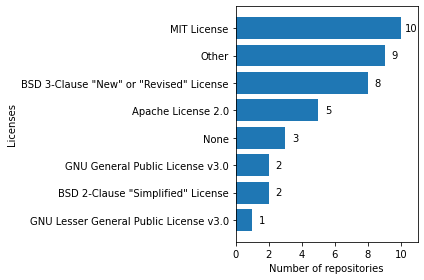

In [9]:
fig, ax = plt.subplots(figsize=(6,4))
s = licenses.groupby('name').size().sort_values()

rects = ax.barh(s.index, s.values)

ax.set_ylabel('Licenses')
ax.set_xlabel('Number of repositories')
# ax.set_title('Number of repositories per license')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width}',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(10, -5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects)
ax.set_xlim(0,s.max()*1.1)
ax.set_xticks(range(0,int(s.max()*1.1),2))
fig.tight_layout()

plt.savefig('../latex/images/nb-items-per-license.pdf')